In [52]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs) 

In [53]:
def average_flow_rate(v, t1,t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64


In [54]:
# Exercise 8.2: Write a Python function secant_line(f,x1,x2) that takes a function f(x) and two values,
# x1 and x2, and that returns a new function representing a secant line over time.
# For instance, if you ran line = secant_line (f,x1,x2), then line(3) would give you the y value of the secant line at x = 3.
def secant_line(f, x1, x2):
    return lambda x: f(x1) + (x - x1) * ((f(x2) - f(x1)) / (x2 - x1))

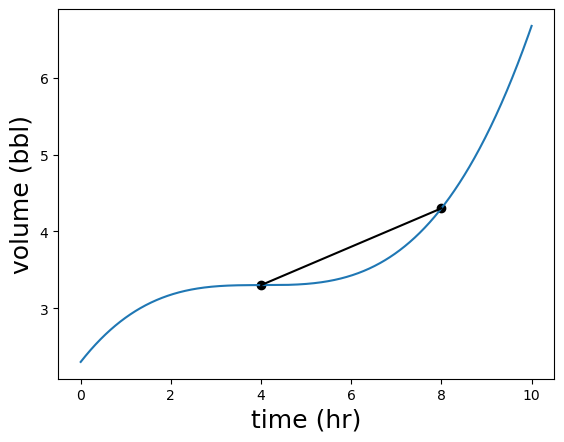

In [55]:
# Exercise 8.3: Write a function that uses the code from the previous exercise to plot a secant line of a function f between two given points.
def plot_secant(f, x1, x2, color='k'):
    line = secant_line(f, x1, x2)
    plot_function(line, x1,x2, c=color)
    plt.scatter([x1,x2], [f(x1), f(x2)], c=color)

plot_volume(volume, 0, 10)
plot_secant(volume, 4, 8)

In [56]:
def interval_flow_rates(v, t1, t2, dt):
    return list(map(lambda t: (t, average_flow_rate(v, t, t + dt)), np.arange(t1, t2, dt)))
interval_flow_rates(volume, 0,10,1)
# plt.scatter(np.arange(0,10,1), interval_flow_rates(volume,0,10,1))

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

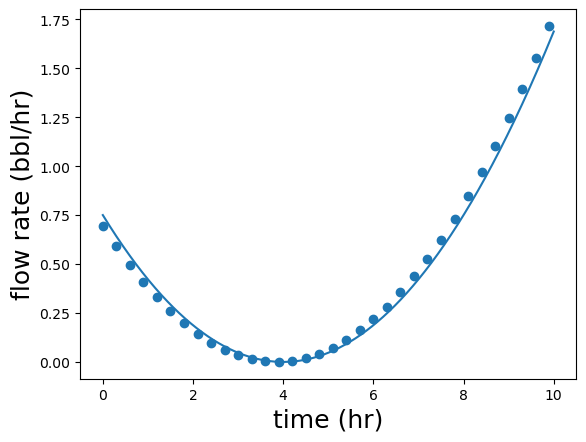

In [72]:
def plot_interval_flow_rates(volume,t1,t2,dt):
   series = interval_flow_rates(volume,t1,t2,dt)
   times,rates= list(zip(*series))
   plt.scatter(times,rates)

plot_interval_flow_rates(volume,0,10,0.3)
plot_flow_rate(flow_rate,0,10)
# plot_volume(volume,0,10)

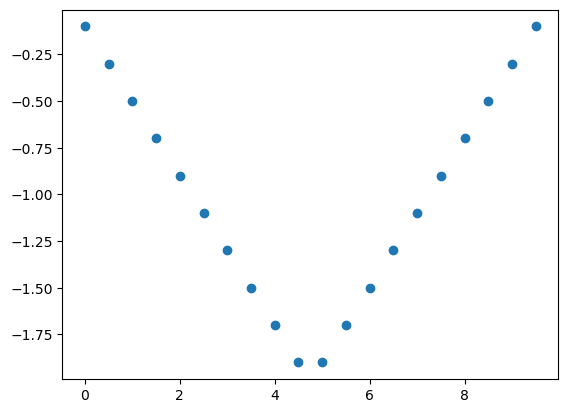

In [73]:
# Exercise 8.4: Plot the decreasing_volume flow rates over time at 0.5-hr intervals.
# When is its flow rate the lowest? That is, when is oil leaving the tank at the fastest rate?
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2
plot_interval_flow_rates(decreasing_volume, 0, 10, 0.5)
# It is around the 5 hour mark, because the flow rate is the lowest around that time

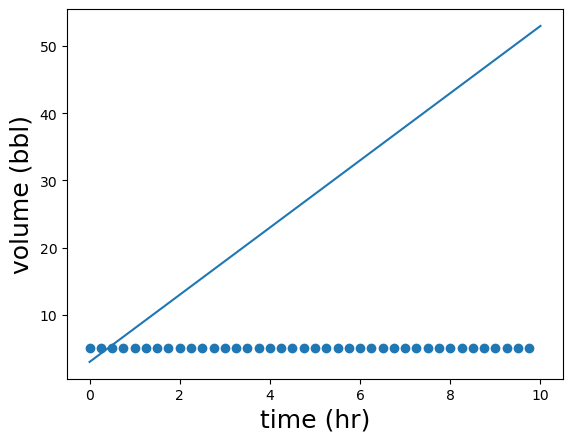

In [96]:
# Exercise 8.5: Write a linear_volume_function and plot the flow rate over time to show that it is constant.
def linear_volume(t):
    return 5 * t + 3
plot_interval_flow_rates(linear_volume, 0, 10, 0.25)
# plot_interval_flow_rates(volume, 0, 10, 0.25)
# plot_volume(volume, 0, 10)
plot_volume(linear_volume, 0, 10)

In [101]:
def instantaneous_flow_rate(fn, t, digits=6):
    diff_tolerance = 10 ** (-digits)
    heuristic = 1
    approx = average_flow_rate(fn, t - heuristic, t + heuristic)
    for _ in range(0, digits * 2):
        heuristic = heuristic / 10
        next_approx = average_flow_rate(fn, t - heuristic, t + heuristic)
        if abs(approx - next_approx) <= diff_tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivates did not converge")


In [105]:
average_flow_rate(volume, 0.999, 1.001)

0.42187501562509583

In [106]:
instantaneous_flow_rate(volume, 1)

0.421875

In [108]:
def get_flow_rate_function(fn):
    return lambda x: instantaneous_flow_rate(fn, x)

In [109]:
fn = get_flow_rate_function(volume)
fn(1)

0.421875

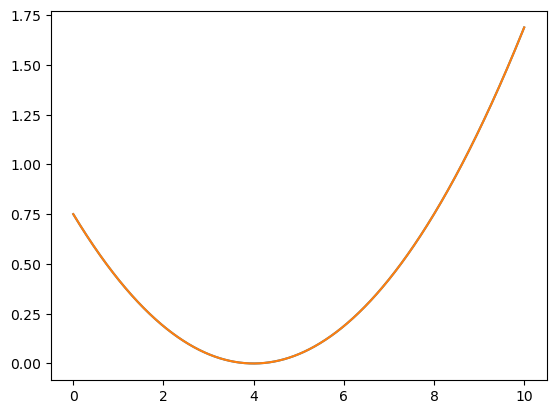

In [112]:
plot_function(flow_rate, 0, 10)
plot_function(fn, 0, 10)

In [123]:
# Exercise 8.6: Confirm that the graph of the volume function is not a straight line on the interval from 0.999 hrs to 1.001 hrs.
print(fn(0.999) == fn(1.001))
sec = secant_line(volume, 0.999, 1.001)(1)
print(sec)
sec == volume(1)

False
2.8781248593749997


False

In [129]:
# Exercise 8.7: Approximate the slope of a tangent line to the volume graph at t = 8 by computing the slopes of smaller and smaller secant lines around t = 8.
print(f"Volume at t = 8 = {volume(8)}")
h = 1
t = 8
print(average_flow_rate(volume, t - h, t + h))
h = h / 10
print(average_flow_rate(volume, t - h, t + h))
h = h / 10
print(average_flow_rate(volume, t - h, t + h))
h = h / 10
print(average_flow_rate(volume, t - h, t + h))
print(f"Slope of the tangent at t = 8 = {fn(8)}")

Volume at t = 8 = 4.3
0.765625
0.7501562500000007
0.750001562499996
0.7500000156249458
Slope of the tangent at t = 8 = 0.75


In [146]:
# Exercise 8.8: For the sign function defined in Python, convince yourself that it doesn’t have a derivative at x = 0:
def sign(x):
   return x/ abs(x)
fn2 = get_flow_rate_function(sign)
fn2(100)
average_flow_rate(sign, -0.0001, 0.0001)

10000.0

In [178]:
def small_volume_change_curry(q, dt):
    return lambda t: q(t) * dt

In [147]:
def small_volume_change(q, t, dt):
    return q(t) * dt

In [150]:
small_volume_change(flow_rate, 2, 1)

0.1875

In [152]:
volume(3) - volume(2)

0.109375

In [154]:
small_volume_change(flow_rate, 2, 0.01)

0.001875

In [157]:
volume(2.01) - volume(2)

0.0018656406250001645

In [159]:
def volume_change(q, t1, t2, dt):
    interval = np.arange(t1, t2, dt)
    return sum(map(lambda x: small_volume_change(q, x, dt), interval))

In [175]:
volume_change(flow_rate, 0, 2, 0.001)

0.8752812656249989

In [176]:
volume(2) - volume(0)

0.875

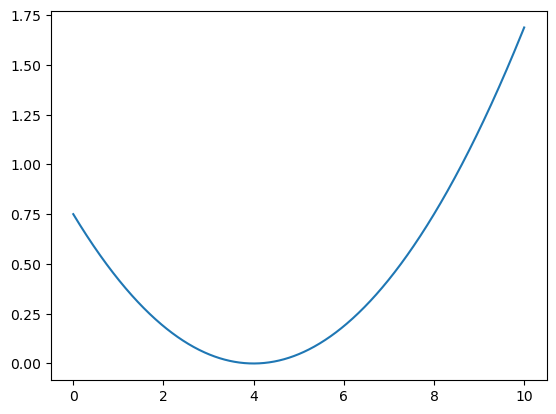

In [181]:
volume_change_fn = small_volume_change_curry(flow_rate, 1)
plot_function(volume_change_fn, 0, 10)

Exercise 8.9: Approximately how much oil is added to the tank in the first 6 hrs? In the last 4 hrs? During which time interval is more added?

In [194]:
print(volume(6) - volume(0))
volume_change(flow_rate, 0,6,0.001)

1.125


1.1252812968749968

In [193]:
print(volume(10) - volume(6))
volume_change(flow_rate, 6, 10, 0.001)

3.25


3.2492500312511767

In [ ]:
def approximate_volume(q,v0,dt,T):
    return v0 + volume_change(q, 0, T, dt)

def approx_volume_curried(q,v0,dt):
    return lambda T: approximate_volume(q,v0,dt, T)